Creating dataset for TP2 - Regression based on dataset used for PF 1s2024

In [1]:
import pandas as pd

df = pd.read_csv("/home/linar/Desktop/ML/Clases/i302/TPs/TP2/Data/pf_suvs_i302_1s2024.csv")

In [2]:
df.head()

,Marca,Modelo,Año,Versión,Color,Tipo de combustible,Puertas,Transmisión,Motor,Tipo de carrocería,Kilómetros,Título,Precio,Moneda,Tipo de vendedor,Con cámara de retroceso
0,Peugeot,2008,2022.0,1.6 Feline Tip am20,Blanco,Nafta,5.0,Automática,1.6,SUV,23000 km,Peugeot 2008 1.6 Feline Tip am20,22499999.0,$,tienda,NaN
1,Peugeot,2008,2021.0,1.6 Allure,Marrón,Nafta,5.0,Manual,1.6,SUV,17000 km,Peugeot 2008 1.6 Allure,21999999.0,$,tienda,NaN
2,Peugeot,2008,2021.0,1.6 Allure,Marrón,Nafta,5.0,Manual,1.6,SUV,17500 km,Peugeot 2008 1.6 Allure,20500000.0,$,tienda,NaN
3,Peugeot,2008,2018.0,1.6 Feline,Blanco,Nafta,5.0,Manual,1.6,SUV,123600 km,Peugeot 2008 1.6 Feline,15000000.0,$,tienda,NaN
4,Peugeot,2008,2016.0,1.6 Thp Sport,Gris,Nafta,5.0,Manual,1.6,SUV,43000 km,Peugeot 2008 1.6 Thp Sport,12500000.0,$,tienda,NaN


In [3]:
df_toyota = df[df["Marca"] == "Toyota"]

In [4]:
df_toyota.head()

,Marca,Modelo,Año,Versión,Color,Tipo de combustible,Puertas,Transmisión,Motor,Tipo de carrocería,Kilómetros,Título,Precio,Moneda,Tipo de vendedor,Con cámara de retroceso
895,Toyota,4Runner,1992.0,2.8 Sl D,Negro,Diésel,5.0,Manual,2.4,SUV,283000 km,Toyota 4Runner 2.8 Sl D,27500.0,U$S,concesionaria,NaN
896,Toyota,4Runner,1996.0,2.8 L D,Rojo,Diésel,5.0,Manual,2.4,SUV,340000 km,Toyota 4Runner 2.8 L D,19000.0,U$S,concesionaria,NaN
897,Toyota,4Runner,1997.0,2.8 L D,NaN,Diésel,5.0,Manual,2.4,SUV,370000 km,Toyota 4Runner 2.8 L D,10900.0,U$S,concesionaria,NaN
898,Toyota,4Runner,1994.0,2.8 L D,Rojo,Diésel,5.0,Manual,2.4,SUV,199000 km,Toyota 4Runner 2.8 L D,16500000.0,$,concesionaria,NaN
899,Toyota,4Runner,1996.0,2.8 L D,NaN,Diésel,5.0,Manual,2.4,SUV,420000 km,Toyota 4Runner 2.8 L D,12500.0,U$S,particular,NaN


In [6]:
df_toyota["Modelo"].unique()

array(['4Runner', 'C-HR', 'Corolla Cross', 'Hilux', 'Hilux SW4',
       'Land Cruiser', 'RAV4', 'SW4'], dtype=object)

In [7]:
df_toyota.loc[df['Modelo'].isin(['Hilux', 'Hilux SW4', 'SW4']), 'Modelo'] = 'Hilux SW4'

In [8]:
df_toyota["Modelo"].unique()

array(['4Runner', 'C-HR', 'Corolla Cross', 'Hilux SW4', 'Land Cruiser',
       'RAV4'], dtype=object)

In [9]:
df_toyota['Modelo'].value_counts()

Modelo
Hilux SW4        1065
Corolla Cross     518
RAV4              231
Land Cruiser       82
4Runner             8
C-HR                2
Name: count, dtype: int64

Due to the number of examples of each model, we decide to only keep hilux sw4, corolla cross and rav4

In [10]:
models_to_remove = ['Land Cruiser', '4Runner', 'C-HR']
df_toyota_filtered = df_toyota[~df_toyota['Modelo'].isin(models_to_remove)]

In [12]:
df_toyota_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1814 entries, 4377 to 16741
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Marca                    1814 non-null   object 
 1   Modelo                   1814 non-null   object 
 2   Año                      1814 non-null   float64
 3   Versión                  1814 non-null   object 
 4   Color                    1142 non-null   object 
 5   Tipo de combustible      1814 non-null   object 
 6   Puertas                  1814 non-null   float64
 7   Transmisión              1808 non-null   object 
 8   Motor                    1806 non-null   object 
 9   Tipo de carrocería       1814 non-null   object 
 10  Kilómetros               1814 non-null   object 
 11  Título                   1814 non-null   object 
 12  Precio                   1814 non-null   float64
 13  Moneda                   1814 non-null   object 
 14  Tipo de vendedor         

Columns to keep (as discussed with robbie):

- Modelo
- Año
- Color
- Combustible
- Transmision
- Motor
- Km
- Tipo de vendedor
- Precio en dolares





In [14]:
df_toyota_filtered = df_toyota_filtered.drop(columns=['Marca', 'Versión', 'Puertas', 'Tipo de carrocería', 'Título', 'Con cámara de retroceso'])

In [15]:
df_toyota_filtered.head()

,Modelo,Año,Color,Tipo de combustible,Transmisión,Motor,Kilómetros,Precio,Moneda,Tipo de vendedor
4377,Corolla Cross,2022.0,Gris,Nafta,Automática,2.0,74000 km,20000000.0,$,concesionaria
4378,Corolla Cross,2024.0,Blanco,Nafta,Automática,2.0,0 km,31086000.0,$,tienda
4379,Corolla Cross,2024.0,Blanco,Híbrido/Nafta,Automática,1.8,1111 km,39900.0,U$S,particular
4380,Corolla Cross,2024.0,Blanco,Híbrido/Nafta,Automática,1.8,0 km,40900.0,U$S,concesionaria
4381,Corolla Cross,2022.0,Gris,Nafta,Automática,2.0,74000 km,34499999.0,$,concesionaria


Change price in ARS to USD. Exchange rate: 1 U$D = 1045 AR$

In [16]:
exchange_rate = 1045

# Convertir precios en pesos a dólares
df_toyota_filtered['Precio_USD'] = df_toyota_filtered.apply(
    lambda row: row['Precio'] / exchange_rate if row['Moneda'] == '$' else row['Precio'], axis=1
)

# Eliminar la columna original 'Precio' y 'Moneda' si ya no son necesarias
df_toyota_filtered = df_toyota_filtered.drop(columns=['Precio', 'Moneda'])

# Renombrar la columna nueva si prefieres
df_toyota_filtered.rename(columns={'Precio_USD': 'Precio'}, inplace=True)

In [17]:
df_toyota_filtered.head()

,Modelo,Año,Color,Tipo de combustible,Transmisión,Motor,Kilómetros,Tipo de vendedor,Precio
4377,Corolla Cross,2022.0,Gris,Nafta,Automática,2.0,74000 km,concesionaria,19138.755981
4378,Corolla Cross,2024.0,Blanco,Nafta,Automática,2.0,0 km,tienda,29747.368421
4379,Corolla Cross,2024.0,Blanco,Híbrido/Nafta,Automática,1.8,1111 km,particular,39900.000000
4380,Corolla Cross,2024.0,Blanco,Híbrido/Nafta,Automática,1.8,0 km,concesionaria,40900.000000
4381,Corolla Cross,2022.0,Gris,Nafta,Automática,2.0,74000 km,concesionaria,33014.353110


In [18]:
df_toyota_filtered.describe()

,Año,Precio
count,1814.000000,1814.000000
mean,2018.248071,34906.338342
std,5.603972,13160.513060
min,1997.000000,1387.559809
25%,2015.000000,25900.000000
50%,2020.000000,34000.000000
75%,2023.000000,42000.000000
max,2024.000000,102000.000000


Download dataset

In [25]:
df_toyota_filtered.to_csv("/home/linar/Desktop/ML/Clases/i302/TPs/TP2/Data/toyota.csv")

## Visualizaciones

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

1. Distribución de Precio por modelo

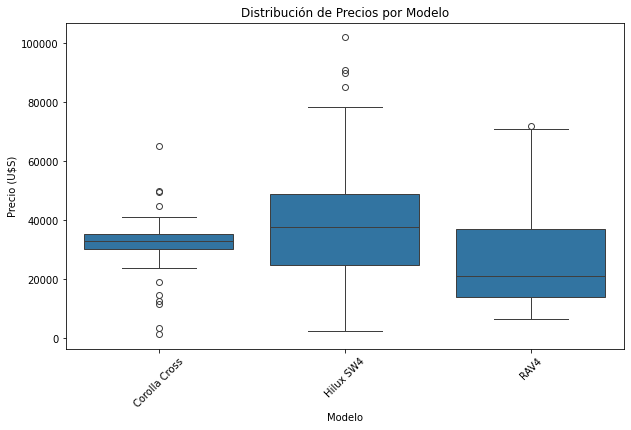

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Modelo', y='Precio', data=df_toyota_filtered)
plt.title('Distribución de Precios por Modelo')
plt.xlabel('Modelo')
plt.ylabel('Precio (U$S)')
plt.xticks(rotation=45)
plt.show()

2. Relación entre Km y Precio

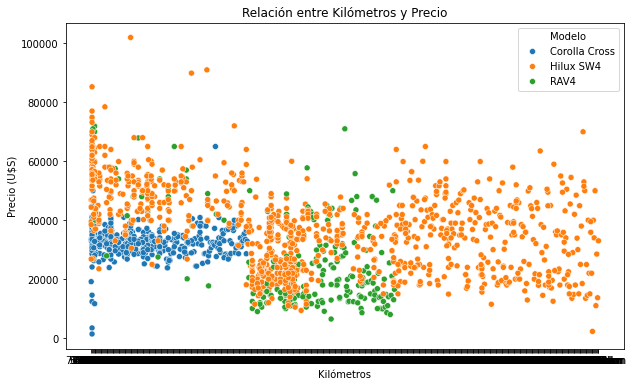

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Kilómetros', y='Precio', hue='Modelo', data=df_toyota_filtered)
plt.title('Relación entre Kilómetros y Precio')
plt.xlabel('Kilómetros')
plt.ylabel('Precio (U$S)')
plt.show()